# Compte rendu TP

## 1. Prise en main rapide

- Lancer Octave ou Python. Récupérer l’ensemble des images qui pourront être utilisées. Le dossier global contient un programme de démonstration (demo.m ou demo.py) ainsi que des images pour tests (dossier imagesTP).
- Tester le programme qui lit puis affiche une image couleur ainsi que ses trois composantes. Les tests seront réalisés à partir des images disponibles dans le répertoire fourni.

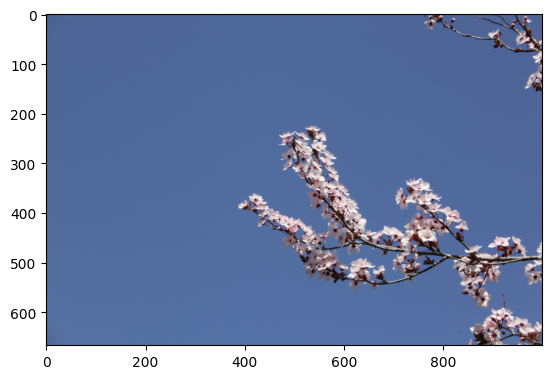

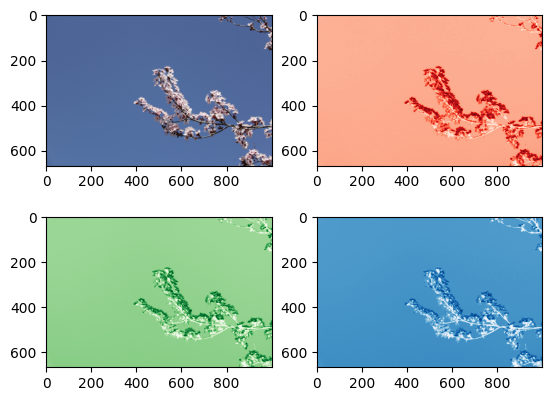

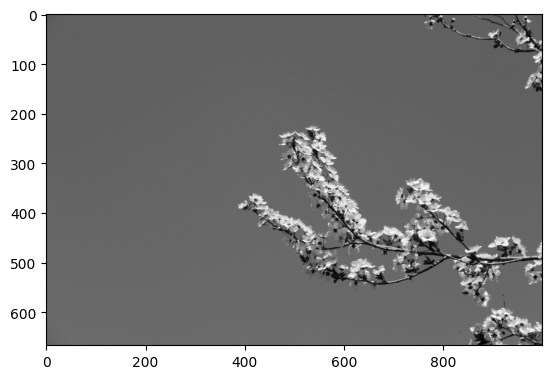

In [47]:
import numpy as np

from matplotlib import pyplot as plt
import cv2 as cv

basepath = "/home/arnobidet/Documents/esirem/Images/TP/imagesTP/"

#Ouvrir une image
img_cerisier = cv.imread(basepath+"CerisierP.jpg")
img_cerisier = cv.cvtColor(img_cerisier,cv.COLOR_BGR2RGB)

#Afficher une image
plt.figure()
plt.imshow(img_cerisier)

#Afficher les canaux
rouge = img_cerisier[:,:, 0]
vert = img_cerisier[:,:, 1]
bleu = img_cerisier[:,:, 2]
plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(img_cerisier)
plt.subplot(2, 2, 2)
plt.imshow(rouge, cmap="Reds")
plt.subplot(2, 2, 3)
plt.imshow(vert, cmap="Greens")
plt.subplot(2, 2, 4)
plt.imshow(bleu, cmap="Blues")

# Transformation en niveau de gris
img_cerisier_G = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
plt.figure()
plt.imshow(imgG, cmap="gray")

plt.show()


- Tester la fonction histogramme des niveaux de gris d’une image.

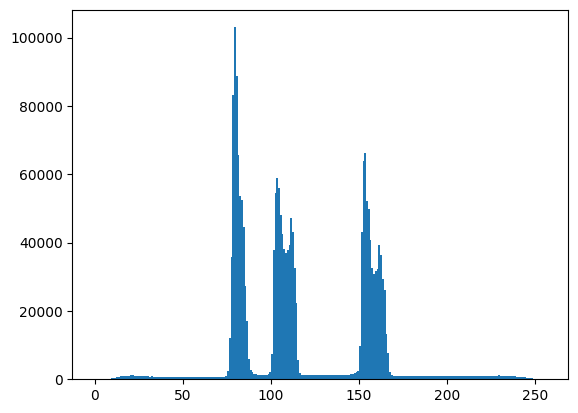

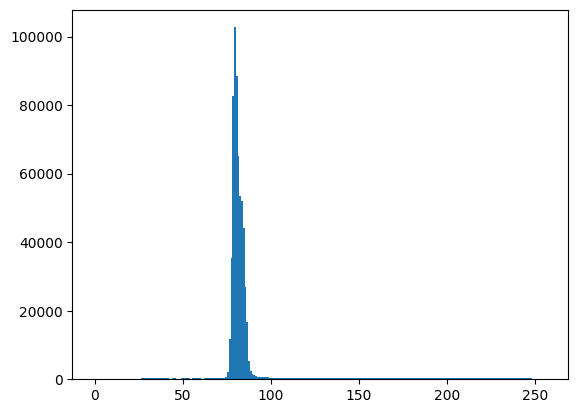

In [48]:
def histogramme(img):
	return cv.calcHist([img],[0],None,[256],[0,256])

def displayHist(img):
	plt.hist(img.ravel(),256,[0,256])
	plt.show()


displayHist(img_cerisier)
displayHist(rouge)



- Écrire et tester un programme permettant de binariser une image. Tout d’abord le seuil sera entré en paramètre (choisi à partir de l’examen visuel de l’histogramme de l’image), puis il sera obtenu automatiquement à partir d’une fonction basée sur la méthode des moments statistiques (cf cours).

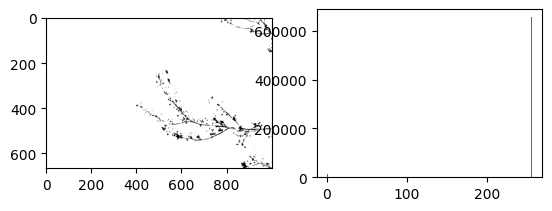

In [51]:
def threshold(img, trsh):
	result = img
	min = 0
	max = 255
	for i in range(0, img.shape[0]):
		for j in range(0, img.shape[1]):
			if img[i][j] > trsh:
				result[i][j] = max
			else:
				result[i][j] = min
	return result

def moment_stat(img,moment_order):
	hist = histogramme(img)
	sum = 0
	for X in range(0, 256):
		sum += hist[X]*X**moment_order
	return sum/(img.shape[0]*img.shape[1])

def auto_threshold(img):
	moment = moment_stat(img,1)
	return threshold(img,moment)

tresh_img = threshold(cv.cvtColor(img_cerisier,cv.COLOR_RGB2GRAY),50)
plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(tresh_img,"grey")
plt.subplot(2, 2, 2)
displayHist(tresh_img)	

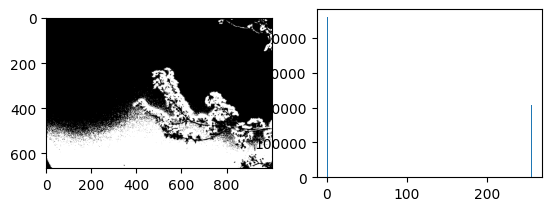

In [53]:

tresh_img_auto = auto_threshold(cv.cvtColor(img_cerisier,cv.COLOR_RGB2GRAY))
plt.figure()
plt.subplot(2, 2, 3)
plt.imshow(tresh_img_auto,"grey")
plt.subplot(2, 2, 4)
displayHist(tresh_img_auto)	

- Écrire un programme qui réalise les opérations suivantes :
  - Calcul et affichage de l’histogramme d’une image (appel de la fonction
    histogramme réalisée en question 3) ;
  - Égalisation d’histogramme sur cette image ;
  - Affichage de la fonction de répartition, de l’histogramme de l’image
    égalisée.
    Tester ce programme avec l’image rue.jpg issue du répertoire.

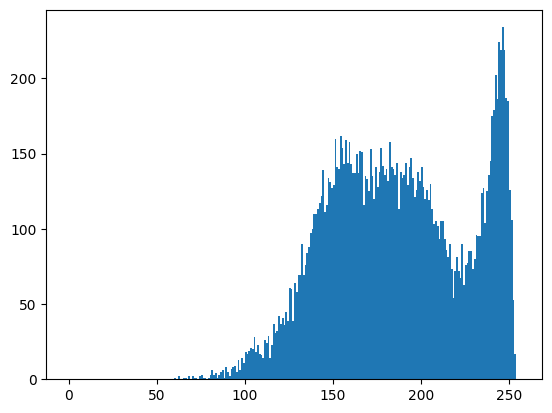

In [56]:
def equalizeHist(img):
	return cv.equalizeHist(img)

img_metal = cv.imread(basepath+"Metal0007GP.png")
img_metal = cv.cvtColor(img_metal,cv.COLOR_BGR2RGB)
displayHist(cv.cvtColor(img_metal,cv.COLOR_RGB2GRAY))
metal_histogramme = histogramme(cv.cvtColor(img_metal,cv.COLOR_RGB2GRAY))




- Écrire un programme qui permet de réaliser des détections de contours d’une image à l’aide des filtres de Roberts, Prewitt et Sobel. Les tests seront effectués à partir des images suivantes
  - Mire blanche de 100x100 pixels centrée sur une image noire de 256x256,
  - Images disponibles dans le répertoire imagesTP.

$$
  \int_0^\infty \frac{x^3}{e^x-1}\,dx = \frac{\pi^4}{15}
$$

## 2. Transformée de Fourier

La transformée de Fourier 2D est une généralisation de la version 1D. Elle permet de passer d’une représentation de l’image dans le domaine spatial (coordonnées $n,m$) à une représentation dans le domaine fréquentiel (coordonnées $f_1,f_2$). La transformée de Fourier d’une séquence discrète 2D $s[n,m]$ s’exprime sous la forme :

$$
	S[f_1,f_2]=\sum_{n=0}^{N-1}\sum_{n=0}^{M-1}s[n,m]e^{-2j\pi(f_1n+f_2m)}
$$

avec $f_1\times f_2=[0,\frac{1}{N},\frac{2}{N},...,\frac{K}{N},...,1-\frac{1}{N}]\times[0,\frac{1}{M},\frac{2}{M},...,\frac{k}{M},...,1-\frac{1}{M}]$

Il apparaît que la transformée de Fourier 2D est séparable. Le principal avantage de cette dissociation est de permettre un calcul rapide de la transformée de Fourier 2D à partir de l'algorithme 1D.

<div style="border:2px solid black; padding 0.5px;">
<strong>Travail demandé :</strong>

- A partir de sa définition proposer une méthodologie réalisant le calcul de la transformée de Fourier 2D sachant que l’on possède la fonction fft permettant de calculer une TFD 1D
</div>

### a. Harmoniques pures

Vous allez maintenant étudier le spectre de Fourier 2D pour différents types d’images.
Vous avez à votre disposition la fonction atom qui s’utilise de la façon suivante : `img=atom(N,M,f1,f2);`
Cette fonction permet de créer des images synthétiques de taille $N \times M$ composées de
bandes périodiques se répétant avec une fréquence $f_1$ selon $n$ et $f_2$ selon $m$.

<div style="border:2px solid black; padding 0.5px;">
<strong>Travail demandé :</strong>

- Créer une image 128 × 128 présentant des oscillations de fréquence 0.1 selon n et 0 selon m en tapant (fe=1) :  
  `img=atom(N,M,f1,f2);`
- Visualiser l’image. Commenter son contenu.
- Commenter le code de la fonction fourier2d(img,fe).
- Visualiser le spectre 2D de cette image en utilisant la fonction précédente.
- Commenter en mettant en avant la corrélation de ce spectre avec l’information spatiale contenue dans le signal 2D, ainsi que ses particularités et propriétés.
- Afin d’appréhender entièrement les différents aspects d’une analyse spectrale d’un motif harmonique pur 2D, vous allez créer, analyser et commenter, suivant le même mode, des images correspondant aux paramètres suivants (N = 128, M = 128) :
  - $f_1=0.1$ $f_2=0$
  - $f_1=0$ $f_2=0.1$
  - $f_1=0.3$ $f_2=0.3$
  - $f_1=-0.3$ $f_2=0.1$

N’oubliez pas de comparer aussi les différences entre les images !
</div>


### b. Contour

L’une des informations essentielles dans les images est l’information contour (limite entre deux objets). Afin d’étudier comment se traduit un contour simple dans le plan fréquentiel, vous allez analyser des images présentant deux zones homogènes avec une seule rupture entre les deux zones (un contour) selon une direction précise.

<div style="border:2px solid black; padding 0.5px;">
<strong>Travail demandé :</strong>

- Créer 3 images : rupt0, rupt1 et rupt2 contenant un contour horizontal, vertical et oblique.
- Pour ces 3 images :
  1.  Afficher l’image.
  2.  Visualiser le spectre.
  3.  Commenter en mettant en avant la corrélation de ce spectre avec l’information contenue dans l’image.
- Conclure sur la localisation d’une rupture dans le domaine fréquentiel.

</div>


### c. Texture

Vous allez maintenant étudier des images réelles.

<div style="border:2px solid black; padding 0.5px;">
<strong>Travail demandé :</strong>

- Charger l’image Metal0007G
- Visualiser l’image
- Visualiser son spectre.
- Commenter les paramètres pertinents du spectre. En déduire des caractéristiques particulières sur le motif présent dans l’image.
- Même travail pour les images :
	- Water0000G
	- Leaves0012G
N’oubliez pas de comparer aussi les différences entre les images.
</div>
